<a href="https://colab.research.google.com/github/prakash-bisht/Mathematics_For_ML/blob/main/Maths_For_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from dataclasses import dataclass
import utils

In [ ]:
# helper function
# utils.py
import string
import random
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import lognorm
import ipywidgets as widgets
from ipywidgets import interact_manual
from dataclasses import dataclass


def sample_size_diff_means(mu1, mu2, sigma, alpha=0.05, beta=0.20, two_sided=True):
    delta = abs(mu2 - mu1)

    if two_sided:
        alpha = alpha / 2

    n = (
        (np.square(sigma) + np.square(sigma))
        * np.square(stats.norm.ppf(1 - alpha) + stats.norm.ppf(1 - beta))
    ) / np.square(delta)

    return math.ceil(n)


def sample_size_diff_proportions(p1, p2, alpha=0.05, beta=0.20, two_sided=True):
    k = 1

    q1, q2 = (1 - p1), (1 - p2)
    p_bar = (p1 + k * p2) / (1 + k)
    q_bar = 1 - p_bar
    delta = abs(p2 - p1)

    if two_sided:
        alpha = alpha / 2

    n = np.square(
        np.sqrt(p_bar * q_bar * (1 + (1 / k))) * stats.norm.ppf(1 - (alpha))
        + np.sqrt((p1 * q1) + (p2 * q2 / k)) * stats.norm.ppf(1 - beta)
    ) / np.square(delta)

    return math.ceil(n)


def generate_user_ids(num_users):

    user_ids = []

    while len(user_ids) < num_users:
        new_id = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))

        if new_id not in user_ids:
            user_ids.append(new_id)

    return user_ids


def run_ab_test_background_color(n_days):

    np.random.seed(42)

    daily_users = 104
    n_control = int(daily_users*n_days*np.random.uniform(0.98, 1.02))
    n_variation = int(daily_users*n_days*np.random.uniform(0.98, 1.02))
    data_control = lognorm.rvs(0.5, loc=0, scale=np.exp(1)*10.5, size=n_control)
    data_variation = lognorm.rvs(0.5, loc=0, scale=np.exp(1)*11.01, size=n_variation)

    user_ids = generate_user_ids(n_control+n_variation)

    control_dict = {"user_id": user_ids[:n_control], "user_type": "control", "session_duration": data_control}
    variation_dict = {"user_id": user_ids[n_control:], "user_type": "variation", "session_duration": data_variation}

    control_df = pd.DataFrame(control_dict)
    variation_df = pd.DataFrame(variation_dict)

    df_ab_test = pd.concat([control_df, variation_df])

    df_ab_test = df_ab_test.sample(frac=1).reset_index(drop=True)

    return df_ab_test



def run_ab_test_personalized_feed(n_days):

    np.random.seed(69)

    daily_users = 519
    n_control = int(daily_users*n_days*np.random.uniform(0.98, 1.02))
    n_variation = int(daily_users*n_days*np.random.uniform(0.98, 1.02))
    data_control = np.random.choice([0, 1], size=n_control, p=[1-0.12, 0.12])
    data_variation = np.random.choice([0, 1], size=n_variation, p=[1-0.15, 0.15])

    user_ids = generate_user_ids(n_control+n_variation)

    control_dict = {"user_id": user_ids[:n_control], "user_type": "control", "converted": data_control}
    variation_dict = {"user_id": user_ids[n_control:], "user_type": "variation", "converted": data_variation}

    control_df = pd.DataFrame(control_dict)
    variation_df = pd.DataFrame(variation_dict)

    df_ab_test = pd.concat([control_df, variation_df])

    df_ab_test = df_ab_test.sample(frac=1).reset_index(drop=True)

    return df_ab_test


@dataclass
class estimation_metrics_prop:
    n: int
    x: int
    p: float

    def __repr__(self):
        return f"sample_params(n={self.n}, x={self.x}, p={self.p:.3f})"


def AB_test_dashboard(z_statistic_diff_proportions, reject_nh_z_statistic):
    def _AB(n1, x1, n2, x2, alpha):

        m1 = estimation_metrics_prop(n=n1, x=x1, p=x1/n1)
        m2 = estimation_metrics_prop(n=n2, x=x2, p=x2/n2)
        z = z_statistic_diff_proportions(m1, m2)
        reject_nh = reject_nh_z_statistic(z, alpha=alpha)
        print(f"The null hypothesis can be rejected at the {alpha:.5f} level of significance: {reject_nh}\n")

        msg = "" if reject_nh else " not"
        print(f"There is{msg} enough statistical evidence against H0.\nThus it can be concluded that there is{msg} a statistically significant difference between the two proportions.")

    n1_selection = widgets.IntText(
        value=4632,
        description='Users A:',
        disabled=False
    )

    n2_selection = widgets.IntText(
        value=4728,
        description='Users B:',
        disabled=False
    )

    x1_selection = widgets.IntText(
        value=576,
        description='Conversions A:',
        disabled=False,
        style = {'description_width': 'initial'}
    )

    x2_selection = widgets.IntText(
        value=718,
        description='Conversions B:',
        disabled=False,
        style = {'description_width': 'initial'}
    )

    alpha_selection = widgets.FloatSlider(
        value=0.05,
        min=0,
        max=1,
        step=0.001,
        description='Alpha:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.2f',
    )


    interact_manual(_AB, n1=n1_selection, x1=x1_selection, n2=n2_selection, x2=x2_selection, alpha=alpha_selection)


#t-test for sample.

control: These users will keep seeing your original website.

variation: These users will see your website with the new background colors.

In [2]:
# Load the data from the test
data = utils.run_ab_test_background_color(n_days=20)
# Print the first 10 rows
data.head(10)

,user_id,user_type,session_duration
0,MBS5RNS2GD,variation,15.528769
1,1AIXWVUWY4,variation,32.287590
2,VCQJDKZGCV,variation,43.718217
3,0L8AUWHGY0,variation,49.519702
4,37YX7FCWNC,control,61.709028
5,1SVMF78GBJ,variation,71.779283
6,SUTKBW4MEQ,variation,23.291835
7,YRZBXYLGH8,control,25.219461
8,C5C87A1CLU,control,26.240482
9,B90YKZS6AR,variation,20.780244


In [3]:
# Separate the data from the two groups (sd stands for session duration)
control_sd_data = data[data["user_type"]=="control"]["session_duration"]
variation_sd_data = data[data["user_type"]=="variation"]["session_duration"]

print(f"{len(control_sd_data)} users saw the original website with an average duration of {control_sd_data.mean():.2f} minutes\n")
print(f"{len(variation_sd_data)} users saw the new website with an average duration of {variation_sd_data.mean():.2f} minutes")

2069 users saw the original website with an average duration of 32.92 minutes

2117 users saw the new website with an average duration of 33.83 minutes


$$t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}}$$

In [4]:
@dataclass
class  estimation_metrics_cont:
  n: int
  xbar: float
  s: float

  def __repr__(self):
    return f"sample_params(n={self.n}, xbar={self.xbar:.3f}, s={self.s:.3f})"

In [7]:
def compute_continuous_metrics(data):
    """Computes the relevant metrics out of a sample for continuous data.

    Args:
        data (pandas.core.series.Series): The sample data. In this case the average session duration for each user.

    Returns:
        estimation_metrics_cont: The metrics saved in a dataclass instance.
    """
    metrics = estimation_metrics_cont(
        n = len(data),
        xbar = np.mean(data),
        s = np.std(data,ddof=1)
    )
    return metrics

In [8]:
# Test your code

cm = compute_continuous_metrics(np.array([1,2,3,4,5]))
print(f"n={cm.n}, xbar={cm.xbar:.2f} and s={cm.s:.2f} for example array\n")

control_metrics = compute_continuous_metrics(control_sd_data)
print(f"n={control_metrics.n}, xbar={control_metrics.xbar:.2f} and s={control_metrics.s:.2f} for control data\n")

variation_metrics = compute_continuous_metrics(variation_sd_data)
print(f"n={variation_metrics.n}, xbar={variation_metrics.xbar:.2f} and s={variation_metrics.s:.2f} for variation data")

n=5, xbar=3.00 and s=1.58 for example array

n=2069, xbar=32.92 and s=17.54 for control data

n=2117, xbar=33.83 and s=18.24 for variation data


$$\text{Degrees of freedom } = \frac{\left[\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2} \right]^2}{\frac{(s_{1}^2/n_1)^2}{n_1-1} + \frac{(s_{2}^2/n_2)^2}{n_2-1}}$$

In [13]:
def degrees_of_freedom(control_metrics, variation_metrics):
    """Computes the degrees of freedom for two samples.

    Args:
        control_metrics (estimation_metrics_cont): The metrics for the control sample.
        variation_metrics (estimation_metrics_cont): The metrics for the variation sample.

    Returns:
        numpy.float: The degrees of freedom.
    """
    n1,s1 = control_metrics.n,control_metrics.s
    n2,s2 = variation_metrics.n,variation_metrics.s

    dof = np.square((s1**2 / n1 + s2**2 / n2)) / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))

    return dof


In [14]:
# Test your code
test_m1, test_m2 = compute_continuous_metrics(np.array([1,2,3])), compute_continuous_metrics(np.array([4,5]))
dof = degrees_of_freedom(test_m1, test_m2)
print(f"DoF for example arrays: {dof:.2f}\n")

dof = degrees_of_freedom(control_metrics, variation_metrics)
print(f"DoF for AB test samples: {dof:.2f}")

DoF for example arrays: 2.88

DoF for AB test samples: 4182.97


In [18]:
def t_statistic_diff_means(control_metrics, variation_metrics):
    """Compute the t-statistic for the difference of two means.

    Args:
        control_metrics (estimation_metrics_cont): The metrics for the control sample.
        variation_metrics (estimation_metrics_cont): The metrics for the variation sample.

    Returns:
        numpy.float: The value of the t-statistic.
    """
    n1,xbar1,s1 = control_metrics.n,control_metrics.xbar,control_metrics.s
    n2,xbar2,s2 = variation_metrics.n,variation_metrics.xbar,variation_metrics.s

    t = (xbar1 - xbar2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
    return t

In [19]:
t = t_statistic_diff_means(test_m1, test_m2)
print(f"t statistic for example arrays: {t:.2f}\n")

t = t_statistic_diff_means(control_metrics, variation_metrics)
print(f"t statistic for AB test: {t:.2f}")

t statistic for example arrays: -3.27

t statistic for AB test: -1.64


In [20]:
def reject_nh_t_statistic(t_statistic, dof, alpha=0.05):
    """Decide whether to reject (or not) the null hypothesis of the t-test.

    Args:
        t_statistic (numpy.float): The computed value of the t-statistic for the two samples.
        dof (numpy.float): The computed degrees of freedom for the two samples.
        alpha (float, optional): The desired level of significancy. Defaults to 0.05.

    Returns:
        bool: True if the null hypothesis should be rejected. False otherwise.
    """
    reject = False
    p_value = 2 * (1 - stats.t.cdf(abs(t),df=dof))

    if p_value < alpha:
      reject = True

    return reject


In [21]:
# Test your code

alpha = 0.05
reject_nh = reject_nh_t_statistic(t, dof, alpha)

print(f"The null hypothesis can be rejected at the {alpha} level of significance: {reject_nh}\n")

msg = "" if reject_nh else " not"
print(f"There is{msg} enough statistical evidence against H0.\nIt can be concluded that there is{msg} a statistically significant difference between the means of the two samples.")

The null hypothesis can be rejected at the 0.05 level of significance: False

There is not enough statistical evidence against H0.
It can be concluded that there is not a statistically significant difference between the means of the two samples.


#z-test for proportion

Sample Size Needed to Compare Two Binomial Proportions Using a Two-Sided Test with Significance Level $\alpha$ and Power $1 - \beta$ Where One Sample $(n_2)$ is $k$ times as Large as the Other Sample $(n_1)$ (Independent-Sample Case)

To test the hypothesis $H_0:p_1 = p_2$ vs. $H_1: p_1 \neq p_2$ for the specific alternative $\mid p_1 - p_2 \mid = \Delta$, with significance level $\alpha$ and power $1 - \beta$, for the following sample size is required

$$n_1 = \frac{\left[\sqrt{\bar{p}\bar{q}\left(1 + \frac{1}{k} \right)}z_{1- \alpha/2} + \sqrt{p_1 q_1 + \frac{p_2q_2}{k}}z_{1-\beta}\right]^2}{\Delta^2}$$
$$n_2 = k n_1$$
where $p_1,p_2 = $ projected true probabilities of success in the two groups
$$q_1,q_2 = 1 - p_1, 1 - p_2$$
$$\Delta  = \mid p_2 - p_1 \mid$$
$$\overline{p} = \frac{p_1 + kp_2}{1+ k}$$

In [22]:
# Compute the sample size required to compare the actual vs desired CVR
required_sample_size = utils.sample_size_diff_proportions(0.12, 0.14)
required_sample_size

4438

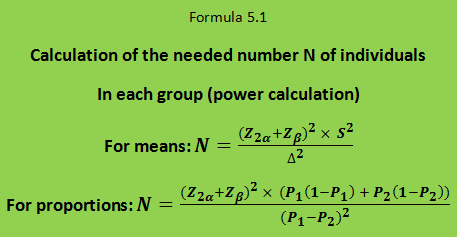

In [23]:
daily_active_users = 1038
n_days = math.ceil((required_sample_size*2)/daily_active_users)
print(f"AB test should run for {n_days} days to gather enough data")

AB test should run for 9 days to gather enough data


In [24]:
data = utils.run_ab_test_personalized_feed(n_days)
data.head(5)

,user_id,user_type,converted
0,RVNGUT5X3G,variation,0
1,G7BKYFO1RR,control,1
2,BSFGHADUH0,variation,0
3,LTABKWUVBW,control,0
4,AYSIVRRMOR,control,0


In [25]:
control_data = data[data["user_type"]=="control"]["converted"]
variation_data = data[data["user_type"]=="variation"]["converted"]

print(f"{len(control_data)} users saw the original app with an average CVR of {control_data.mean():.4f}\n")
print(f"{len(variation_data)} users saw the app with the new feature with an average CVR of {variation_data.mean():.4f}")

4632 users saw the original app with an average CVR of 0.1244

4728 users saw the app with the new feature with an average CVR of 0.1519


z-statistic:

$$ z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

where $\hat{p}$ is the pooled proportion: $\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$

In [26]:
@dataclass
class estimation_metrics_prop:
    n: int
    x: int
    p: float

    def __repr__(self):
        return f"sample_params(n={self.n}, x={self.x}, p={self.p:.3f})"

In [27]:
def compute_proportion_metrics(data):
    """Computes the relevant metrics out of a sample for proportion-like data.

    Args:
        data (pandas.core.series.Series): The sample data. In this case 1 if the user converted and 0 otherwise.

    Returns:
        estimation_metrics_prop: The metrics saved in a dataclass instance.
    """

    metrics = estimation_metrics_prop(
        n=len(data),
        x=data.sum(),
        p=data.mean()
    )

    return metrics

In [28]:
cm = compute_proportion_metrics(np.array([1,0,0,1]))
print(f"n={cm.n}, x={cm.x} and p={cm.p:.4f} for sample array\n")

control_metrics = compute_proportion_metrics(control_data)
print(f"n={control_metrics.n}, x={control_metrics.x} and p={control_metrics.p:.4f} for control data\n")

variation_metrics = compute_proportion_metrics(variation_data)
print(f"n={variation_metrics.n}, x={variation_metrics.x} and p={variation_metrics.p:.4f} for variation data")

n=4, x=2 and p=0.5000 for sample array

n=4632, x=576 and p=0.1244 for control data

n=4728, x=718 and p=0.1519 for variation data


In [31]:
def pooled_proportion(control_metrics, variation_metrics):
    """Compute the pooled proportion for the two samples.

    Args:
        control_metrics (estimation_metrics_prop): The metrics for the control sample.
        variation_metrics (estimation_metrics_prop): The metrics for the variation sample.

    Returns:
        numpy.float: The pooled proportion.
    """
    x1,n1 = control_metrics.x, control_metrics.n
    x2,n2 = variation_metrics.x,variation_metrics.n

    pp = (x1 + x2) / (n1 + n2)

    return pp

In [32]:
test_m1, test_m2 = compute_proportion_metrics(np.array([1,0,1])), compute_proportion_metrics(np.array([1,1,1,0]))
pp = pooled_proportion(test_m1, test_m2)
print(f"pooled proportion for example arrays: {pp:.4f}\n")

pp = pooled_proportion(control_metrics, variation_metrics)
print(f"pooled proportion for AB test samples: {pp:.4f}")

pooled proportion for example arrays: 0.7143

pooled proportion for AB test samples: 0.1382


In [33]:
def z_statistic_diff_proportions(control_metrics, variation_metrics):
    """Compute the z-statistic for the difference of two proportions.

    Args:
        control_metrics (estimation_metrics_prop): The metrics for the control sample.
        variation_metrics (estimation_metrics_prop): The metrics for the variation sample.

    Returns:
        numpy.float: The z-statistic.
    """
    pp = pooled_proportion(control_metrics, variation_metrics)

    n1,p1 = control_metrics.n,control_metrics.p
    n2,p2 = variation_metrics.n,variation_metrics.p

    z = (p1 - p2) / np.sqrt(pp * (1 - pp) * ((1/n1) + (1/n2)))
    return z

In [34]:
z = z_statistic_diff_proportions(test_m1, test_m2)
print(f"z statistic for example arrays: {z:.4f}\n")

z = z_statistic_diff_proportions(control_metrics, variation_metrics)
print(f"z statistic for AB test: {z:.4f}")

z statistic for example arrays: -0.2415

z statistic for AB test: -3.8551


In [35]:
def reject_nh_z_statistic(z_statistic, alpha=0.05):
    """Decide whether to reject (or not) the null hypothesis of the z-test.

    Args:
        z_statistic (numpy.float): The computed value of the z-statistic for the two proportions.
        alpha (float, optional): The desired level of significancy. Defaults to 0.05.

    Returns:
        bool: True if the null hypothesis should be rejected. False otherwise.
    """
    reject = False
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

    if p_value < alpha:
        reject = True

    return reject

In [36]:
alpha = 0.05
reject_nh = reject_nh_z_statistic(z, alpha)

print(f"The null hypothesis can be rejected at the {alpha} level of significance: {reject_nh}\n")

msg = "" if reject_nh else " not"
print(f"There is{msg} enough statistical evidence against H0.\nThus it can be concluded that there is{msg} a statistically significant difference between the two proportions.")

The null hypothesis can be rejected at the 0.05 level of significance: True

There is enough statistical evidence against H0.
Thus it can be concluded that there is a statistically significant difference between the two proportions.


$$ \hat{p} \pm z_{1-\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

In [37]:
def confidence_interval_proportion(metrics, alpha=0.05):
    """Compute the confidende interval for a proportion-like sample.

    Args:
        metrics (estimation_metrics_prop): The metrics for the sample.
        alpha (float, optional): The desired level of significance. Defaults to 0.05.

    Returns:
        (numpy.float, numpy.float): The lower and upper bounds of the confidence interval.
    """
    n, p = metrics.n, metrics.p
    distance = stats.norm.ppf(1 - alpha / 2) * np.sqrt(p * (1 - p) / n)

    lower = p - distance
    upper = p + distance

    return lower, upper

In [38]:
c_lower, c_upper = confidence_interval_proportion(control_metrics)
print(f"Confidence interval for control group: [{c_lower:.3f}, {c_upper:.3f}]\n")

v_lower, v_upper = confidence_interval_proportion(variation_metrics)
print(f"Confidence interval for variation group: [{v_lower:.3f}, {v_upper:.3f}]")

Confidence interval for control group: [0.115, 0.134]

Confidence interval for variation group: [0.142, 0.162]


In [39]:
utils.AB_test_dashboard(z_statistic_diff_proportions, reject_nh_z_statistic)

interactive(children=(IntText(value=4632, description='Users A:'), IntText(value=576, description='Conversions…